<a href="https://colab.research.google.com/github/sneymz00/learn_IA/blob/main/Tree_Decision_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌳 ÁRBOLES DE DECISIÓN
**¡Tu primera aventura en Machine Learning!**

## 👋 ¡Bienvenido!

Hoy vamos a aprender cómo enseñarle a una computadora a tomar decisiones, ¡igual que lo hacemos nosotros!

No necesitas saber matemáticas complicadas ni programación avanzada. Solo curiosidad y ganas de aprender.

### 🎯 Al final de hoy podrás:
- Entender qué es Machine Learning con ejemplos cotidianos
- Crear tu primer modelo inteligente
- Resolver un problema real paso a paso


## 🔧 Paso 1: Preparar Nuestro Espacio de Trabajo

Primero vamos a verificar que todo funciona correctamente. ¡Es como preparar la cocina antes de cocinar!

In [ ]:
# ¡Nuestro primer código!
print("¡Hola Machine Learning!")
print("Estoy listo para aprender 🚀")

# Verificar que tenemos las herramientas necesarias
try:
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.tree import plot_tree

    print("\n✅ ¡Perfecto! Todas las herramientas están listas")
    print("📚 Ahora podemos empezar a crear modelos inteligentes")

except ImportError as e:
    print(f"❌ Ups, necesitamos instalar algo: {e}")
    print("💡 Pide ayuda a tu instructor")

¡Hola Machine Learning!
Estoy listo para aprender 🚀

✅ ¡Perfecto! Todas las herramientas están listas
📚 Ahora podemos empezar a crear modelos inteligentes


## 🧠 ¿Qué es Machine Learning?

### Piénsalo así:

**Machine Learning = Enseñar a la computadora con ejemplos**

### 👶 Como aprende un niño:
1. Ve muchas fotos de gatos y perros
2. Nota diferencias: orejas, cola, tamaño
3. Cuando ve un animal nuevo → ¡puede decir si es gato o perro!

### 🤖 Como aprende una computadora:
1. Le damos muchos datos de ejemplo
2. Encuentra patrones automáticamente
3. Puede clasificar datos nuevos

### 🌟 Ejemplos que usas todos los días:
- 🎬 **Netflix**: "¿Qué película te gustará?"
- 📧 **Gmail**: "¿Este email es spam?"
- 🛒 **Amazon**: "¿Qué producto recomendarte?"
- 🚗 **GPS**: "¿Cuál es la mejor ruta?"

## 🌳 ¿Por qué Árboles de Decisión?

### ¡Porque piensas como un árbol de decisión todos los días!

**Ejemplo: Decidir si salir a correr**

```
            ¿Está lloviendo?
           /              \
       SÍ /                \ NO
         /                  \
[Gym en casa]          ¿Hace calor?
                       /           \
                   SÍ /             \ NO
                     /               \
            [Shorts]              [Con chaqueta]
```

### 🏆 ¿Por qué son idóneos?
- ✅ **Fáciles de entender**: Como un diagrama de flujo
- ✅ **Explican sus decisiones**: Puedes seguir el camino
- ✅ **No necesitan matemáticas**: Solo preguntas sí/no
- ✅ **Funcionan con cualquier dato**: Números, texto, categorías

## 🍕 Ejercicio: Tu Primer Árbol Mental (Derterminar 3 niveles de preguntas)

**Problema**: Decidir dónde almorzar

### 🤔 Piensa:
1. ¿Qué preguntas te haces antes de decidir?
2. ¿En qué orden las haces?
3. ¿Cómo cada respuesta afecta tu decisión?

### ✏️ Escribe en este espacio tu árbol:
```
¿Primera pregunta?
/               \
                  
```

*Tómate 10 minutos para pensar y dibujar*

## 📊 Creando Nuestros Primeros Datos

Vamos a crear un dataset sobre **"¿Ir al cine?"** paso a paso.

### 🎬 Factores que consideramos:
- **Clima**: ¿Está soleado o lluvioso?
- **Dinero**: ¿Tengo mucho o poco?
- **Acompañante**: ¿Voy solo o acompañado?
- **Decisión**: ¿Al final fui o no?

In [ ]:
# Vamos a crear datos sobre decisiones de ir al cine
import pandas as pd

# Nuestros datos de ejemplo (situaciones reales)
datos_cine = {
    'Clima': ['Soleado', 'Lluvioso', 'Soleado', 'Lluvioso',
              'Soleado', 'Lluvioso', 'Soleado', 'Lluvioso'],

    'Dinero': ['Poco', 'Mucho', 'Mucho', 'Poco',
               'Mucho', 'Mucho', 'Poco', 'Poco'],

    'Acompañante': ['No', 'No', 'Sí', 'Sí',
                    'No', 'Sí', 'No', 'Sí'],

    'Fue_al_Cine': ['No', 'No', 'Sí', 'Sí',
                    'No', 'Sí', 'No', 'Sí']
}

# Convertir a una tabla que Python entienda
df_cine = pd.DataFrame(datos_cine)

print("🎬 Nuestro dataset de decisiones de cine:")
print(df_cine)

print(f"\n📊 Tenemos {len(df_cine)} situaciones diferentes")
print(f"✅ Veces que SÍ fue: {sum(df_cine['Fue_al_Cine'] == 'Sí')}")
print(f"❌ Veces que NO fue: {sum(df_cine['Fue_al_Cine'] == 'No')}")

🎬 Nuestro dataset de decisiones de cine:
      Clima Dinero Acompañante Fue_al_Cine
0   Soleado   Poco          No          No
1  Lluvioso  Mucho          No          No
2   Soleado  Mucho          Sí          Sí
3  Lluvioso   Poco          Sí          Sí
4   Soleado  Mucho          No          No
5  Lluvioso  Mucho          Sí          Sí
6   Soleado   Poco          No          No
7  Lluvioso   Poco          Sí          Sí

📊 Tenemos 8 situaciones diferentes
✅ Veces que SÍ fue: 4
❌ Veces que NO fue: 4


## 🔍 Explorando Nuestros Datos

Antes de crear nuestro modelo, vamos a entender mejor nuestros datos. ¡Es como conocer los ingredientes antes de cocinar!

In [ ]:
# ¿Qué patrones podemos ver?
print("🔍 ANALIZANDO PATRONES:")
print("=" * 30)

# Patrón 1: ¿El clima afecta la decisión?
print("☀️ CLIMA vs DECISIÓN:")
clima_decision = pd.crosstab(df_cine['Clima'], df_cine['Fue_al_Cine'])
print(clima_decision)

print("\n💰 DINERO vs DECISIÓN:")
dinero_decision = pd.crosstab(df_cine['Dinero'], df_cine['Fue_al_Cine'])
print(dinero_decision)

print("\n👥 ACOMPAÑANTE vs DECISIÓN:")
acompañante_decision = pd.crosstab(df_cine['Acompañante'], df_cine['Fue_al_Cine'])
print(acompañante_decision)

print("\n🤔 ¿Qué patrón notas? ¿Qué factor parece más importante?")

🔍 ANALIZANDO PATRONES:
☀️ CLIMA vs DECISIÓN:
Fue_al_Cine  No  Sí
Clima              
Lluvioso      1   3
Soleado       3   1

💰 DINERO vs DECISIÓN:
Fue_al_Cine  No  Sí
Dinero             
Mucho         2   2
Poco          2   2

👥 ACOMPAÑANTE vs DECISIÓN:
Fue_al_Cine  No  Sí
Acompañante        
No            4   0
Sí            0   4

🤔 ¿Qué patrón notas? ¿Qué factor parece más importante?


## 🔤 Preparando Datos para la Computadora

### 🤖 Problema:
Las computadoras no entienden palabras como "Soleado" o "Mucho". Solo entienden números.

### 💡 Solución:
Vamos a convertir palabras a números, ¡como crear un diccionario de traducción!

In [ ]:
# Importar el "traductor" de palabras a números
from sklearn.preprocessing import LabelEncoder

print("🔤 ANTES - Datos con palabras:")
print(df_cine.head())

# Crear copias para trabajar
df_numerico = df_cine.copy()

# Convertir cada columna de palabras a números
print("\n🔄 Convirtiendo a números...")

# Para CLIMA: Lluvioso=0, Soleado=1
le_clima = LabelEncoder()
df_numerico['Clima_num'] = LabelEncoder().fit_transform(df_cine['Clima'])
print(f"Clima: {list(le_clima.classes_)} → {list(range(len(le_clima.classes_)))}")

# Para DINERO: Mucho=0, Poco=1
le_dinero = LabelEncoder()
df_numerico['Dinero_num'] = le_dinero.fit_transform(df_cine['Dinero'])
print(f"Dinero: {list(le_dinero.classes_)} → {list(range(len(le_dinero.classes_)))}")

# Para ACOMPAÑANTE: No=0, Sí=1
le_acompañante = LabelEncoder()
df_numerico['Acompañante_num'] = le_acompañante.fit_transform(df_cine['Acompañante'])
print(f"Acompañante: {list(le_acompañante.classes_)} → {list(range(len(le_acompañante.classes_)))}")

# Para DECISIÓN: No=0, Sí=1
le_decision = LabelEncoder()
df_numerico['Decision_num'] = le_decision.fit_transform(df_cine['Fue_al_Cine'])
print(f"Decisión: {list(le_decision.classes_)} → {list(range(len(le_decision.classes_)))}")

print("\n🔢 DESPUÉS - Datos con números:")
print(df_numerico[['Clima', 'Clima_num', 'Dinero', 'Dinero_num',
                   'Acompañante', 'Acompañante_num', 'Fue_al_Cine', 'Decision_num']].head())

🔤 ANTES - Datos con palabras:
      Clima Dinero Acompañante Fue_al_Cine
0   Soleado   Poco          No          No
1  Lluvioso  Mucho          No          No
2   Soleado  Mucho          Sí          Sí
3  Lluvioso   Poco          Sí          Sí
4   Soleado  Mucho          No          No

🔄 Convirtiendo a números...


AttributeError: 'LabelEncoder' object has no attribute 'classes_'

## 🎯 Preparando para el Modelo

### 📝 Conceptos importantes:
- **X** = Las "preguntas" que hace nuestro modelo (características)
- **y** = La "respuesta" que queremos predecir (objetivo)

### 🎪 Analogía del Mago:
- **X** = Las pistas que ve el mago (cartas, gestos)
- **y** = Lo que debe adivinar (tu carta)

In [ ]:
# Separar "preguntas" de "respuestas"

# X = Las características (lo que usa el modelo para decidir)
X = df_numerico[['Clima_num', 'Dinero_num', 'Acompañante_num']]
print("❓ PREGUNTAS que hará nuestro modelo (X):")
print(X)

# y = El objetivo (lo que queremos predecir)
y = df_numerico['Decision_num']
print("\n🎯 RESPUESTA que queremos predecir (y):")
print(y.values)

print("\n💡 Nuestro modelo aprenderá:")
print("   'Cuando veo X (clima, dinero, acompañante)'")
print("   'Debo predecir y (ir o no ir al cine)'")

❓ PREGUNTAS que hará nuestro modelo (X):
   Clima_num  Dinero_num  Acompañante_num
0          1           1                0
1          0           0                0
2          1           0                1
3          0           1                1
4          1           0                0
5          0           0                1
6          1           1                0
7          0           1                1

🎯 RESPUESTA que queremos predecir (y):
[0 0 1 1 0 1 0 1]

💡 Nuestro modelo aprenderá:
   'Cuando veo X (clima, dinero, acompañante)'
   'Debo predecir y (ir o no ir al cine)'


## 🌳 ¡Creando Nuestro Primer Árbol de Decisión!

### 🎉 ¡Este es el momento mágico!

Vamos a crear un modelo que aprenda nuestros patrones de decisión y pueda predecir qué haríamos en situaciones nuevas.

In [ ]:
# ¡Crear nuestro primer modelo de Machine Learning!
from sklearn.tree import DecisionTreeClassifier

print("🌱 Creando nuestro árbol de decisión...")

# Crear el modelo
modelo_cine = DecisionTreeClassifier(
    max_depth=3,        # Máximo 3 niveles (para mantenerlo simple)
    random_state=42     # Para que siempre dé el mismo resultado
)

print("✅ Modelo creado")

# "Entrenar" el modelo (¡que aprenda de nuestros datos!)
print("🎓 Enseñando al modelo con nuestros ejemplos...")
modelo_cine.fit(X, y)

print("\n🎉 ¡LISTO! Nuestro modelo ya aprendió")
print("🧠 Ahora sabe cómo decidir si ir al cine")
print("🔮 Puede predecir qué harías en situaciones nuevas")

🌱 Creando nuestro árbol de decisión...
✅ Modelo creado
🎓 Enseñando al modelo con nuestros ejemplos...

🎉 ¡LISTO! Nuestro modelo ya aprendió
🧠 Ahora sabe cómo decidir si ir al cine
🔮 Puede predecir qué harías en situaciones nuevas


## 🔮 ¡Probando Nuestro Modelo!

### ✨ ¡La parte más emocionante!

Vamos a darle situaciones nuevas a nuestro modelo y ver qué decide.

In [ ]:
# Probar con situaciones nuevas
print("🧪 PROBANDO NUESTRO MODELO:")
print("=" * 35)

# Situación 1: Día soleado, mucho dinero, con acompañante
# Recordar: Lluvioso=0,Soleado=1 | Mucho=0,Poco=1 | No=0,Sí=1
situacion1 = [[1, 0, 1]]  # [Soleado, Mucho dinero, Con acompañante]
prediccion1 = modelo_cine.predict(situacion1)

print("🌞 Situación 1: Día soleado, mucho dinero, con acompañante")
if prediccion1[0] == 1:
    print("   🎬 Predicción: ¡SÍ, ir al cine!")
else:
    print("   🏠 Predicción: NO ir al cine")

# Situación 2: Día lluvioso, poco dinero, solo
situacion2 = [[0, 1, 0]]  # [Lluvioso, Poco dinero, Solo]
prediccion2 = modelo_cine.predict(situacion2)

print("\n🌧️ Situación 2: Día lluvioso, poco dinero, solo")
if prediccion2[0] == 1:
    print("   🎬 Predicción: ¡SÍ, ir al cine!")
else:
    print("   🏠 Predicción: NO ir al cine")

# Situación 3: Día lluvioso, mucho dinero, con acompañante
situacion3 = [[0, 0, 1]]  # [Lluvioso, Mucho dinero, Con acompañante]
prediccion3 = modelo_cine.predict(situacion3)

print("\n🌧️ Situación 3: Día lluvioso, mucho dinero, con acompañante")
if prediccion3[0] == 1:
    print("   🎬 Predicción: ¡SÍ, ir al cine!")
else:
    print("   🏠 Predicción: NO ir al cine")

print("\n🤔 ¿Las predicciones tienen sentido? ¿Coinciden con lo que tú harías?")

🧪 PROBANDO NUESTRO MODELO:
🌞 Situación 1: Día soleado, mucho dinero, con acompañante
   🎬 Predicción: ¡SÍ, ir al cine!

🌧️ Situación 2: Día lluvioso, poco dinero, solo
   🏠 Predicción: NO ir al cine

🌧️ Situación 3: Día lluvioso, mucho dinero, con acompañante
   🎬 Predicción: ¡SÍ, ir al cine!

🤔 ¿Las predicciones tienen sentido? ¿Coinciden con lo que tú harías?


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 👀 ¡Veamos Cómo Piensa Nuestro Árbol!

### 🎨 La mejor parte de los árboles: ¡podemos ver exactamente cómo deciden!

Es como leer la mente de nuestro modelo.

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


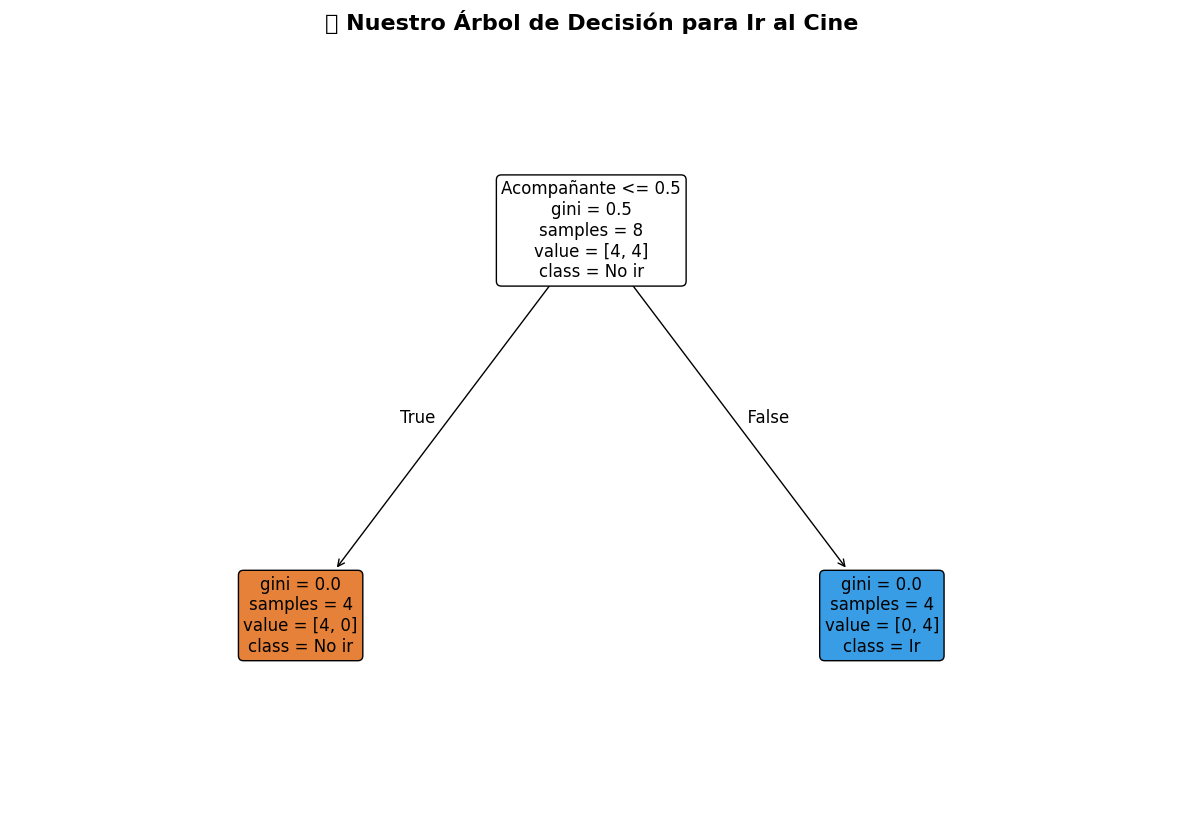


📖 CÓMO LEER EL ÁRBOL:
🔹 Cada caja = una pregunta o decisión
🔹 Las ramas = posibles respuestas (Sí/No)
🔹 Colores = predicción final
🔹 'samples' = cuántos ejemplos llegaron a ese nodo
🔹 'value' = [ejemplos de No ir, ejemplos de Ir]

🎯 ¡Intenta seguir el camino para las situaciones que probamos antes!


In [ ]:
# Visualizar nuestro árbol de decisión
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Crear un gráfico grande para ver bien el árbol
plt.figure(figsize=(15, 10))

# Dibujar el árbol con etiquetas claras
plot_tree(modelo_cine,
          feature_names=['Clima', 'Dinero', 'Acompañante'],  # Nombres de características
          class_names=['No ir', 'Ir'],  # Nombres de las decisiones
          filled=True,      # Colorear los nodos
          rounded=True,     # Nodos redondeados
          fontsize=12)      # Tamaño de texto

plt.title("🌳 Nuestro Árbol de Decisión para Ir al Cine", fontsize=16, fontweight='bold')
plt.show()

print("\n📖 CÓMO LEER EL ÁRBOL:")
print("=" * 25)
print("🔹 Cada caja = una pregunta o decisión")
print("🔹 Las ramas = posibles respuestas (Sí/No)")
print("🔹 Colores = predicción final")
print("🔹 'samples' = cuántos ejemplos llegaron a ese nodo")
print("🔹 'value' = [ejemplos de No ir, ejemplos de Ir]")

print("\n🎯 ¡Intenta seguir el camino para las situaciones que probamos antes!")

## 🎮 ¡Tu Turno de Experimentar!

### 🧪 Ejercicio Interactivo

Modifica los valores abajo y ve qué predice el modelo:

In [ ]:
# 🎛️ PANEL DE CONTROL - ¡Cambia estos valores y ejecuta!

# Configura tu situación (cambia estos valores):
mi_clima = 1        # 0 = Lluvioso, 1 = Soleado
mi_dinero = 0       # 0 = Mucho, 1 = Poco
mi_acompañante = 1  # 0 = No, 1 = Sí

# 🔮 Ver predicción
mi_situacion = [[mi_clima, mi_dinero, mi_acompañante]]
mi_prediccion = modelo_cine.predict(mi_situacion)

# 📊 Mostrar resultado bonito
print("🎯 TU SITUACIÓN:")
print("=" * 20)
clima_texto = "Soleado" if mi_clima == 1 else "Lluvioso"
dinero_texto = "Mucho" if mi_dinero == 0 else "Poco"
acompañante_texto = "Sí" if mi_acompañante == 1 else "No"

print(f"☀️ Clima: {clima_texto}")
print(f"💰 Dinero: {dinero_texto}")
print(f"👥 Acompañante: {acompañante_texto}")

print("\n🔮 PREDICCIÓN DEL MODELO:")
if mi_prediccion[0] == 1:
    print("   🎬 ¡SÍ, deberías ir al cine!")
else:
    print("   🏠 NO ir al cine sería mejor")

print("\n🤔 ¿Estás de acuerdo con la predicción?")

🎯 TU SITUACIÓN:
☀️ Clima: Soleado
💰 Dinero: Mucho
👥 Acompañante: Sí

🔮 PREDICCIÓN DEL MODELO:
   🎬 ¡SÍ, deberías ir al cine!

🤔 ¿Estás de acuerdo con la predicción?


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 📊 ¿Qué tan Bueno es Nuestro Modelo?

### 🎯 Concepto importante: Accuracy (Precisión)

**Accuracy = ¿En cuántas predicciones acertó el modelo?**

### 🎓 Analogía del Examen:
- Si en un examen de 10 preguntas aciertas 8 → Tu accuracy es 80%
- Si el modelo predice bien 8 de 10 casos → Su accuracy es 80%

In [ ]:
# Evaluar qué tan bien funciona nuestro modelo
from sklearn.metrics import accuracy_score

# Hacer predicciones sobre todos nuestros datos originales
predicciones_todas = modelo_cine.predict(X)

# Comparar con las decisiones reales
accuracy = accuracy_score(y, predicciones_todas)

print("📊 EVALUACIÓN DE NUESTRO MODELO:")
print("=" * 35)
print(f"✅ Accuracy: {accuracy:.2%}")
print(f"📈 Esto significa que acertó {accuracy:.1%} de las veces")

# Mostrar comparación detallada
print("\n🔍 COMPARACIÓN DETALLADA:")
print("Real\tPredicción\t¿Correcto?")
print("-" * 30)

for i in range(len(y)):
    real = "Ir" if y.iloc[i] == 1 else "No ir"
    pred = "Ir" if predicciones_todas[i] == 1 else "No ir"
    correcto = "✅" if y.iloc[i] == predicciones_todas[i] else "❌"
    print(f"{real}\t{pred}\t\t{correcto}")

if accuracy == 1.0:
    print("\n🎉 ¡PERFECTO! El modelo acertó en todos los casos")
    print("💡 Esto puede significar que nuestros datos son muy simples")
elif accuracy >= 0.8:
    print("\n😊 ¡Muy bien! El modelo aprendió bien nuestros patrones")
else:
    print("\n🤔 El modelo necesita mejorar. Tal vez necesitamos más datos")


print(df_cine)

📊 EVALUACIÓN DE NUESTRO MODELO:
✅ Accuracy: 100.00%
📈 Esto significa que acertó 100.0% de las veces

🔍 COMPARACIÓN DETALLADA:
Real	Predicción	¿Correcto?
------------------------------
No ir	No ir		✅
No ir	No ir		✅
Ir	Ir		✅
Ir	Ir		✅
No ir	No ir		✅
Ir	Ir		✅
No ir	No ir		✅
Ir	Ir		✅

🎉 ¡PERFECTO! El modelo acertó en todos los casos
💡 Esto puede significar que nuestros datos son muy simples
      Clima Dinero Acompañante Fue_al_Cine
0   Soleado   Poco          No          No
1  Lluvioso  Mucho          No          No
2   Soleado  Mucho          Sí          Sí
3  Lluvioso   Poco          Sí          Sí
4   Soleado  Mucho          No          No
5  Lluvioso  Mucho          Sí          Sí
6   Soleado   Poco          No          No
7  Lluvioso   Poco          Sí          Sí


## 🚀 ¡Proyecto Final: Detector de Spam!

### 📧 Vamos a crear algo súper útil

Ahora que ya sabes lo básico, vamos a crear un detector de emails spam. ¡Como los que usan Gmail y otros servicios!

### 🎯 Características que analizaremos:
- **Exclamaciones**: ¿Cuántos ! tiene el email?
- **Mayúsculas**: ¿Cuántas palabras EN MAYÚSCULAS?
- **Palabra "PREMIO"**: ¿Aparece esta palabra?
- **Palabra "URGENTE"**: ¿Aparece esta palabra?

In [ ]:
# Crear dataset de emails (simulado pero realista)
import numpy as np

# Establecer semilla para resultados reproducibles
np.random.seed(42)

print("📧 Creando dataset de emails...")

# Crear 100 emails de ejemplo
num_emails = 100

datos_emails = {
    'exclamaciones': [],
    'mayusculas': [],
    'tiene_premio': [],
    'tiene_urgente': [],
    'es_spam': []
}

# Generar emails normales y spam con patrones realistas
for i in range(num_emails):
    if i < 70:  # Primeros 70 = emails normales
        exclamaciones = np.random.randint(0, 2)  # 0-1 exclamaciones
        mayusculas = np.random.randint(0, 3)     # 0-2 palabras en mayúsculas
        tiene_premio = 0 if np.random.random() > 0.1 else 1  # 10% probabilidad
        tiene_urgente = 0 if np.random.random() > 0.05 else 1  # 5% probabilidad
        es_spam = 0
    else:  # Últimos 30 = emails spam
        exclamaciones = np.random.randint(2, 8)  # 2-7 exclamaciones
        mayusculas = np.random.randint(3, 10)    # 3-9 palabras en mayúsculas
        tiene_premio = 1 if np.random.random() > 0.3 else 0  # 70% probabilidad
        tiene_urgente = 1 if np.random.random() > 0.4 else 0  # 60% probabilidad
        es_spam = 1

    datos_emails['exclamaciones'].append(exclamaciones)
    datos_emails['mayusculas'].append(mayusculas)
    datos_emails['tiene_premio'].append(tiene_premio)
    datos_emails['tiene_urgente'].append(tiene_urgente)
    datos_emails['es_spam'].append(es_spam)

# Crear DataFrame
df_emails = pd.DataFrame(datos_emails)

print("✅ Dataset creado")
print(f"📊 Total emails: {len(df_emails)}")
print(f"📧 Emails normales: {sum(df_emails['es_spam'] == 0)}")
print(f"🚫 Emails spam: {sum(df_emails['es_spam'] == 1)}")

print("\n👀 Primeros 10 emails:")
print(df_emails.head(10))

📧 Creando dataset de emails...
✅ Dataset creado
📊 Total emails: 100
📧 Emails normales: 70
🚫 Emails spam: 30

👀 Primeros 10 emails:
   exclamaciones  mayusculas  tiene_premio  tiene_urgente  es_spam
0              0           0             0              0        0
1              0           2             0              0        0
2              0           0             0              0        0
3              1           0             0              0        0
4              1           1             0              0        0
5              1           1             0              0        0
6              0           2             0              0        0
7              1           2             0              0        0
8              0           2             0              0        0
9              0           2             0              0        0


In [ ]:
# Analizar diferencias entre emails normales y spam
print("🔍 ANÁLISIS: ¿Qué diferencias hay?")
print("=" * 40)

emails_normales = df_emails[df_emails['es_spam'] == 0]
emails_spam = df_emails[df_emails['es_spam'] == 1]

print("📧 EMAILS NORMALES (promedio):")
print(f"   Exclamaciones: {emails_normales['exclamaciones'].mean():.1f}")
print(f"   Mayúsculas: {emails_normales['mayusculas'].mean():.1f}")
print(f"   Tienen 'PREMIO': {emails_normales['tiene_premio'].mean():.1%}")
print(f"   Tienen 'URGENTE': {emails_normales['tiene_urgente'].mean():.1%}")

print("\n🚫 EMAILS SPAM (promedio):")
print(f"   Exclamaciones: {emails_spam['exclamaciones'].mean():.1f}")
print(f"   Mayúsculas: {emails_spam['mayusculas'].mean():.1f}")
print(f"   Tienen 'PREMIO': {emails_spam['tiene_premio'].mean():.1%}")
print(f"   Tienen 'URGENTE': {emails_spam['tiene_urgente'].mean():.1%}")

print("\n🤔 ¿Notas las diferencias? ¡Esos son los patrones que aprenderá el modelo!")

🔍 ANÁLISIS: ¿Qué diferencias hay?
📧 EMAILS NORMALES (promedio):
   Exclamaciones: 0.5
   Mayúsculas: 1.1
   Tienen 'PREMIO': 12.9%
   Tienen 'URGENTE': 1.4%

🚫 EMAILS SPAM (promedio):
   Exclamaciones: 4.7
   Mayúsculas: 5.9
   Tienen 'PREMIO': 73.3%
   Tienen 'URGENTE': 73.3%

🤔 ¿Notas las diferencias? ¡Esos son los patrones que aprenderá el modelo!


In [ ]:
# Dividir datos en entrenamiento y prueba
print("📚 Dividiendo datos para entrenar y probar el modelo...")

# Preparar características (X) y objetivo (y)
X_emails = df_emails[['exclamaciones', 'mayusculas', 'tiene_premio', 'tiene_urgente']]
y_emails = df_emails['es_spam']

# Dividir: 70% para entrenar, 30% para probar
X_train, X_test, y_train, y_test = train_test_split(
    X_emails, y_emails,
    test_size=0.3,      # 30% para prueba
    random_state=42,    # Para resultados reproducibles
    stratify=y_emails   # Mantener proporción de spam/normal
)

print(f"✅ División completada:")
print(f"   📚 Entrenamiento: {len(X_train)} emails")
print(f"   🧪 Prueba: {len(X_test)} emails")

# Crear y entrenar el detector de spam
print("\n🚫 Creando detector de spam...")

detector_spam = DecisionTreeClassifier(
    max_depth=4,            # Un poco más profundo para este problema
    min_samples_split=5,    # Mínimo 5 ejemplos para dividir
    random_state=42
)

# Entrenar
detector_spam.fit(X_train, y_train)

print("🎓 ¡Detector entrenado!")

# Evaluar en datos de prueba
accuracy_spam = detector_spam.score(X_test, y_test)
print(f"\n📊 Accuracy del detector: {accuracy_spam:.1%}")

if accuracy_spam >= 0.9:
    print("🎉 ¡Excelente! El detector es muy bueno")
elif accuracy_spam >= 0.8:
    print("😊 ¡Bien! El detector funciona bastante bien")
else:
    print("🤔 El detector necesita mejorar")

📚 Dividiendo datos para entrenar y probar el modelo...
✅ División completada:
   📚 Entrenamiento: 70 emails
   🧪 Prueba: 30 emails

🚫 Creando detector de spam...
🎓 ¡Detector entrenado!

📊 Accuracy del detector: 100.0%
🎉 ¡Excelente! El detector es muy bueno


In [ ]:
# ¡Probar nuestro detector con emails específicos!
print("🧪 PROBANDO EL DETECTOR DE SPAM:")
print("=" * 35)

# Email claramente spam
email_spam = [[7, 8, 1, 1]]  # 7 exclamaciones, 8 mayúsculas, tiene PREMIO y URGENTE
pred_spam = detector_spam.predict(email_spam)

print("🚫 Email sospechoso:")
print("   - 7 exclamaciones (!!!!!!!)")
print("   - 8 palabras en MAYÚSCULAS")
print("   - Contiene 'PREMIO'")
print("   - Contiene 'URGENTE'")
print(f"   🔮 Predicción: {'SPAM' if pred_spam[0] == 1 else 'NORMAL'}")

# Email claramente normal
email_normal = [[0, 1, 0, 0]]  # 0 exclamaciones, 1 mayúscula, sin palabras spam
pred_normal = detector_spam.predict(email_normal)

print("\n📧 Email normal:")
print("   - 0 exclamaciones")
print("   - 1 palabra en mayúsculas")
print("   - No contiene 'PREMIO'")
print("   - No contiene 'URGENTE'")
print(f"   🔮 Predicción: {'SPAM' if pred_normal[0] == 1 else 'NORMAL'}")

# Email dudoso
email_dudoso = [[2, 3, 1, 0]]  # 2 exclamaciones, 3 mayúsculas, tiene PREMIO pero no URGENTE
pred_dudoso = detector_spam.predict(email_dudoso)

print("\n❓ Email dudoso:")
print("   - 2 exclamaciones")
print("   - 3 palabras en MAYÚSCULAS")
print("   - Contiene 'PREMIO'")
print("   - No contiene 'URGENTE'")
print(f"   🔮 Predicción: {'SPAM' if pred_dudoso[0] == 1 else 'NORMAL'}")

print("\n🤔 ¿Te parecen correctas las predicciones?")

🧪 PROBANDO EL DETECTOR DE SPAM:
🚫 Email sospechoso:
   - 7 exclamaciones (!!!!!!!)
   - 8 palabras en MAYÚSCULAS
   - Contiene 'PREMIO'
   - Contiene 'URGENTE'
   🔮 Predicción: SPAM

📧 Email normal:
   - 0 exclamaciones
   - 1 palabra en mayúsculas
   - No contiene 'PREMIO'
   - No contiene 'URGENTE'
   🔮 Predicción: NORMAL

❓ Email dudoso:
   - 2 exclamaciones
   - 3 palabras en MAYÚSCULAS
   - Contiene 'PREMIO'
   - No contiene 'URGENTE'
   🔮 Predicción: SPAM

🤔 ¿Te parecen correctas las predicciones?


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


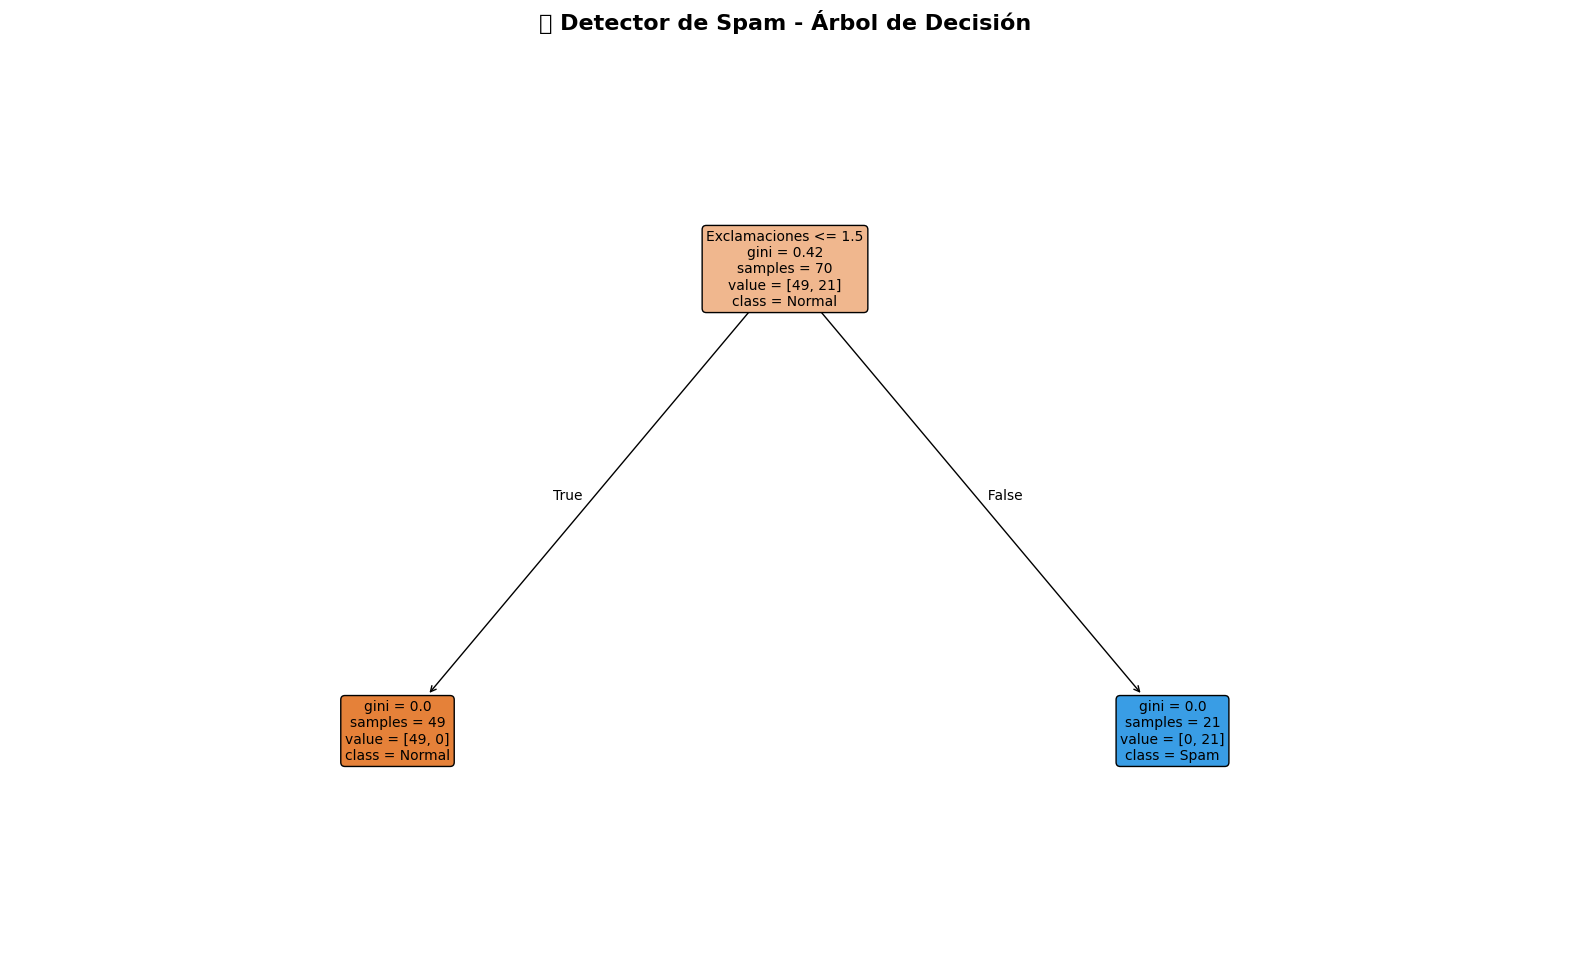


🎯 ¡Intenta seguir el camino del árbol para los emails que probamos!

💡 Observa cómo el modelo aprendió que:
   - Muchas exclamaciones = más probabilidad de spam
   - Palabras como 'PREMIO' = señal de spam
   - La combinación de factores es lo que cuenta


In [ ]:
# Visualizar el árbol del detector de spam
plt.figure(figsize=(20, 12))

plot_tree(detector_spam,
          feature_names=['Exclamaciones', 'Mayúsculas', 'Premio', 'Urgente'],
          class_names=['Normal', 'Spam'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("🚫 Detector de Spam - Árbol de Decisión", fontsize=16, fontweight='bold')
plt.show()

print("\n🎯 ¡Intenta seguir el camino del árbol para los emails que probamos!")
print("\n💡 Observa cómo el modelo aprendió que:")
print("   - Muchas exclamaciones = más probabilidad de spam")
print("   - Palabras como 'PREMIO' = señal de spam")
print("   - La combinación de factores es lo que cuenta")

## 🎓 ¿Cómo Seguir Aprendiendo?

### 📚 Próximos pasos recomendados:

#### 1. **Practica más con árboles de decisión**
- Crea detectores para otros problemas (música, películas, deportes)
- Experimenta con diferentes parámetros
- Usa datos reales de internet

#### 2. **Aprende otros algoritmos**
- **Random Forest**: Muchos árboles trabajando juntos
- **Regresión Logística**: Para otros tipos de problemas
- **K-Nearest Neighbors**: Basado en vecinos cercanos

#### 3. **Mejora tus habilidades técnicas**
- Más Python y pandas para manejar datos
- Visualización de datos con matplotlib
- Estadística básica para entender mejor los resultados

### 🌐 Recursos gratuitos recomendados:
- **Kaggle Learn**: Cursos gratuitos y prácticos
- **YouTube - StatQuest**: Explicaciones súper claras
- **Coursera**: Curso de Machine Learning de Andrew Ng
- **Datasets para practicar**: UCI ML Repository, Kaggle

### 💡 Ideas para proyectos propios:
1. **Predictor de éxito de películas** (basado en género, director, etc.)
2. **Clasificador de música** (rock, pop, jazz)
3. **Detector de noticias falsas** (palabras clave, fuente, etc.)
4. **Recomendador de restaurantes** (precio, tipo, ubicación)
